# Dataset Visualisation SemEval Task 4
Hyperpartisan News detection

##### Ignore the warning below

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Tune maxlimit because... we have LOTS of data
mpl.rcParams['agg.path.chunksize'] = 100000
mpl.rcParams['savefig.dpi'] = 1000

df = pd.read_csv('consolidated.csv')

In [4]:
print(df.describe(),'\n')
print(df.columns)

          articleId  content_length  content_polarity    title_length  \
count  1.000000e+06  1000000.000000    1000000.000000  1000000.000000   
mean   7.724636e+05     4611.406966          0.005815       59.475444   
std    4.289178e+05     7079.726960          0.012722       58.501440   
min    1.000000e+00       28.000000         -0.156250        0.000000   
25%    3.952780e+05     1578.000000         -0.001552       39.000000   
50%    8.189150e+05     3002.000000          0.005587       54.000000   
75%    1.137630e+06     5356.000000          0.013085       68.000000   
max    1.494892e+06   718864.000000          0.175133    13338.000000   

       title_polarity  hyperpartisan     orientation  
count  1000000.000000      1000000.0  1000000.000000  
mean        -0.000860            0.5       -0.303740  
std          0.046851            0.5        7.473908  
min         -0.828125            0.0      -10.000000  
25%         -0.015625            0.0       -6.250000  
50%         

### Remove None Dates

In [5]:
date_less = df[df['article_date']!='None']
# print(date_less.info())

date_less = date_less[(date_less['article_date']!='0201-04-10') & (date_less['article_date']!='0200-01-02')]
date_less['article_date'] = pd.to_datetime(date_less['article_date'], format='%Y-%m-%d')
date_less.head()

,articleId,content_length,content_polarity,title_length,title_polarity,article_date,hyperpartisan,orientation
0,17,4059,-0.006372,124,-0.001502,2004-07-29,0,-5
1,19,4284,0.002802,82,-0.055664,2017-10-05,1,10
2,23,3668,-0.007138,84,-0.031250,2017-04-20,1,10
3,24,18071,0.009181,260,0.018701,2011-01-14,0,5
4,26,16970,0.019337,24,0.001465,2016-01-13,0,5


#### Plot 

Not so interesting plots of date vs length of articles.

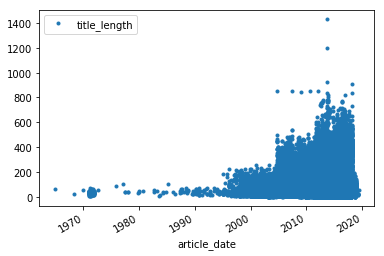

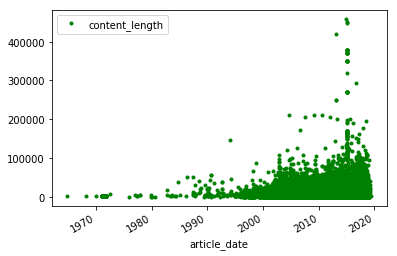

In [6]:
date_less.plot('article_date', 'title_length', style='.')
plt.savefig('figures/date_vs_title_len.png')
date_less.plot('article_date', 'content_length', c='g', style='.')
plt.savefig('figures/date_vs_content_len.png')

Some more plots, depicting ground truth.

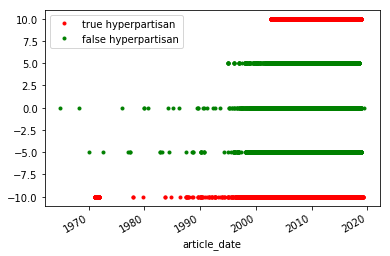

In [7]:
hyper_part = date_less[date_less['hyperpartisan']==1]
normal = date_less[date_less['hyperpartisan']==0]
ax = hyper_part.plot('article_date', 'orientation', c='r', style='.')
normal.plot('article_date', 'orientation', c='g', ax=ax, style='.')
ax.legend(['true hyperpartisan', 'false hyperpartisan'])
plt.savefig('figures/date_vs_orientation.png')

/home/viresh/.virtualenvs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/viresh/.virtualenvs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


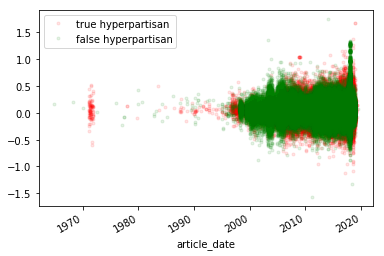

In [17]:
hyper_part['content_polarity'] = 10*hyper_part['content_polarity']
normal['content_polarity'] = 10*normal['content_polarity']
ax = hyper_part.plot('article_date', 'content_polarity', c='r', style='.', alpha=0.1)
normal.plot('article_date', 'content_polarity', c='g', style='.', ax=ax, alpha=0.1)
ax.legend(['true hyperpartisan', 'false hyperpartisan'])
plt.savefig('figures/date_vs_sentiment.png')